In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 4.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

# Packages

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import matplotlib        as mt
from matplotlib.gridspec import GridSpec

# Dataset

In [3]:
my_data   = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')
dust_data = pd.read_csv('../../Match/ALL_GAMA_MAGPHYS_SELECTED.csv')

In [4]:
for i in my_data.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

# K-correction

In [5]:
fuv_k = []
nuv_k = []
r_k = []
uvclass = []
for i in range(my_data['UV_CLASS_YI2011'].values.size):
    fuv_k.append(my_data['KCORR_FUV'].values[i])
    nuv_k.append(my_data['KCORR_NUV'].values[i])
    r_k.append(my_data['KCORR_R'].values[i])
    uvclass.append(my_data['UV_CLASS_YI2011'].values[i])

fuv_k   = np.array(fuv_k)
nuv_k   = np.array(nuv_k)
r_k     = np.array(r_k)
uvclass = np.array(uvclass)

header = np.array(['KCORR_FUV', 'KCORR_NUV', 'KCORR_R', 'UV_CLASS'])
kcorr_data = np.column_stack([fuv_k, nuv_k, r_k, uvclass])
kcorr_data = pd.DataFrame(kcorr_data, columns=header)

In [6]:
palette = ['#1b9e77','#d95f02','#7570b3']

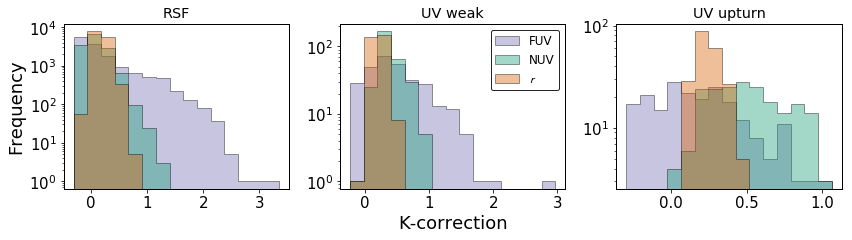

In [7]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=15, color=palette[2], edgecolor='black', 
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[0], edgecolor='black', alpha=0.4, 
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='RSF'], bins=bins, color=palette[1], edgecolor='black', alpha=0.4, 
         label='$r$', histtype='stepfilled')
plt.title('RSF')
plt.ylabel('Frequency')
plt.yscale('log')


plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=15, color=palette[2], edgecolor='black',
                            alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_WEAK'], bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV weak')
# plt.ylabel('Frequency')
plt.xlabel('K-correction')
plt.yscale('log')
plt.legend(loc='best')

plt.subplot(1,3,3)
n, bins, patches = plt.hist(x=fuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=15, color=palette[2], 
                            edgecolor='black', alpha=0.4, label='FUV', histtype='stepfilled')
plt.hist(x=nuv_k[kcorr_data['UV_CLASS']=='UV_UPTURN'], bins=bins, edgecolor='black', color=palette[0], alpha=0.4,
         label='NUV', histtype='stepfilled')
plt.hist(x=r_k[kcorr_data['UV_CLASS']=='UV_UPTURN'],   bins=bins, edgecolor='black', color=palette[1], alpha=0.4,
         label='$r$', histtype='stepfilled')
plt.title('UV upturn')
plt.yscale('log')
plt.tight_layout()
plt.savefig('../../LargeFilesResults/PaperFigs/kcorrections.pdf')
plt.savefig('../../LargeFilesResults/PaperFigs/kcorrections.png')
plt.show()

# Dust mass fraction

In [8]:
mass_fraction = dust_data['mass_dust_best_fit']/(dust_data['mass_stellar_best_fit']+dust_data['mass_dust_best_fit'])

In [9]:
duspedia_ratio = np.log10(dust_data['mass_stellar_best_fit'].values/dust_data['mass_dust_best_fit'].values)

In [10]:
dust_data['mass_fraction'] = mass_fraction
dust_data['log_mdust/mstar'] = duspedia_ratio

# Matching data

In [11]:
new_match = my_data.merge(dust_data, on=['CATAID'], how='left', indicator=True)

In [12]:
# for i in range(new_match['CATAID'].values.size):
#     if new_match['_merge'].values[i]!='both':
#         print (new_match['UV_CLASS_YI2011'].values[i])
#         print (new_match['L_dust_best_fit'].values[i])
#     else:
#         continue

In [13]:
uv_weak_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_WEAK']
uv_uptr_objs = new_match[new_match['UV_CLASS_YI2011']=='UV_UPTURN']

In [14]:
uv_weak_rp = new_match[(new_match['UV_CLASS_YI2011']=='UV_WEAK')&(new_match['WHAN_CLASS']=='Retired/Passive')]
uv_uptr_rp = new_match[(new_match['UV_CLASS_YI2011']=='UV_UPTURN')&(new_match['WHAN_CLASS']=='Retired/Passive')]

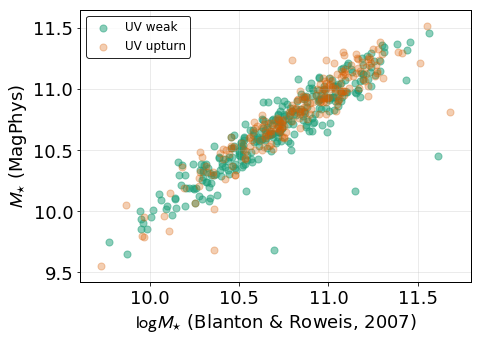

In [15]:
plt.rcParams.update(plotpars)
plt.scatter(x=uv_weak_objs['logmstar'], y=np.log10(uv_weak_objs['mass_stellar_best_fit'].values), alpha=0.5, 
            c=palette[0], label='UV weak', s=50)
plt.scatter(x=uv_uptr_objs['logmstar'], y=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), alpha=0.3, 
            c=palette[1], label='UV upturn', s=50)
plt.xlabel(r"$\log M_{\star}$ (Blanton & Roweis, 2007)")
plt.ylabel(r"$M_{\star}$ (MagPhys)")
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_masses.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_masses.pdf')
plt.show()

In [16]:
uvwk_smass = np.log10(uv_weak_objs['mass_stellar_best_fit'].values)
uvwk_dmass = np.log10(uv_weak_objs['mass_dust_best_fit'].values)
uvwk_mfrac = uv_weak_objs['mass_fraction'].values

In [17]:
uvup_smass = np.log10(uv_uptr_objs['mass_stellar_best_fit'].values)
uvup_dmass = np.log10(uv_uptr_objs['mass_dust_best_fit'].values)
uvup_mfrac = uv_uptr_objs['mass_fraction'].values

In [18]:
# binning the stellar mass to properly create a bar-plot
num = 12
bins = np.linspace(start=uvup_smass.min(), stop=uvup_smass.max(), num=num, retstep=True)
samples, step = bins

In [19]:
print(uvup_smass.min(), uvup_smass.max())  # wider range
print(uvwk_smass.min(), uvwk_smass.max())

9.548512256341036 11.516006213178402
9.647871784847041 11.45545397943056


In [20]:
bar_data={}
row_temp = []
df_temp = []
for i in range(samples.size-1):
    data_temp = []
    for j in range(uvup_smass.size-1):
        if samples[i]<=uvup_smass[j] and samples[i+1]>=uvup_smass[j]:
            data_temp.append(mass_fraction[j])
        else:
            continue
    massfrac_median = np.median(data_temp)
    row_temp = np.stack((samples[i], massfrac_median))
    df_temp = np.hstack((df_temp, row_temp))

df_temp = df_temp.reshape(num-1, 2)
bar_df = pd.DataFrame(df_temp, columns=['smass_bin', 'median_massfrac'])
bar_df

,smass_bin,median_massfrac
0,9.548512,0.003079
1,9.727375,0.001523
2,9.906238,0.000849
3,10.085102,0.001419
4,10.263965,0.001520
5,10.442828,0.001106
6,10.621691,0.000695
7,10.800554,0.001065
8,10.979417,0.001612
9,11.158280,0.000529


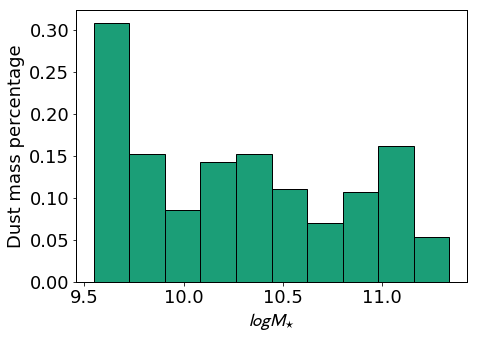

In [21]:
for b in range(bar_df['smass_bin'].values.size-1):
    plt.bar(x=bar_df['smass_bin'].values[b], height=bar_df['median_massfrac'].values[b]*100, 
            width=(bar_df['smass_bin'].values[b+1]-bar_df['smass_bin'].values[b]), color=palette[0], 
            edgecolor='black', align='edge')
plt.xlabel(r"$log M_{\star}$")
plt.ylabel("Dust mass percentage")
plt.show()

In [22]:
barwk_data={}
row_temp = []
df_temp = []
for i in range(samples.size-1):
    data_temp = []
    for j in range(uvwk_smass.size-1):
        if samples[i]<=uvwk_smass[j] and samples[i+1]>=uvwk_smass[j]:
            data_temp.append(mass_fraction[j])
        else:
            continue
    massfrac_median = np.median(data_temp)
    row_temp = np.stack((samples[i], massfrac_median))
    df_temp = np.hstack((df_temp, row_temp))

df_temp = df_temp.reshape(num-1, 2)
barwk_df = pd.DataFrame(df_temp, columns=['smass_bin', 'median_massfrac'])
barwk_df

,smass_bin,median_massfrac
0,9.548512,0.001671
1,9.727375,0.000763
2,9.906238,0.001493
3,10.085102,0.000641
4,10.263965,0.000988
5,10.442828,0.001003
6,10.621691,0.001353
7,10.800554,0.000733
8,10.979417,0.001011
9,11.158280,0.000753


In [23]:
uv_pal = ['#dfc27d', '#a6611a']

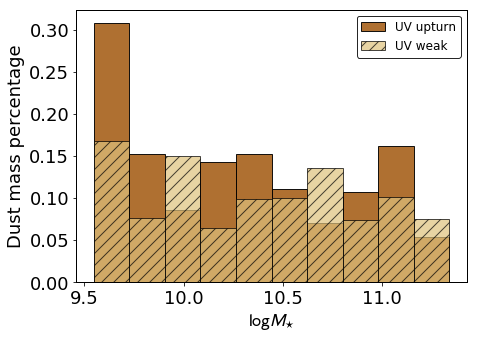

In [24]:
for b in range(barwk_df['smass_bin'].values.size-1):
    plt.bar(x=bar_df['smass_bin'].values[b], height=bar_df['median_massfrac'].values[b]*100, 
            width=(bar_df['smass_bin'].values[b+1]-bar_df['smass_bin'].values[b]), color=uv_pal[1], 
            edgecolor='black', align='edge', alpha=.9, label='UV upturn')
    plt.bar(x=barwk_df['smass_bin'].values[b], height=barwk_df['median_massfrac'].values[b]*100, 
            width=(barwk_df['smass_bin'].values[b+1]-barwk_df['smass_bin'].values[b]), color=uv_pal[0], 
            edgecolor='black', align='edge', alpha=0.7, label='UV weak', hatch='//')
    if b==0:
        plt.legend(loc='best')
    else:
        continue
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel("Dust mass percentage")
plt.show()

In [25]:
bar_df.describe()

,smass_bin,median_massfrac
count,11.000000,11.000000
mean,10.442828,0.001387
std,0.593222,0.000698
min,9.548512,0.000529
25%,9.995670,0.000957
50%,10.442828,0.001419
75%,10.889985,0.001567
max,11.337143,0.003079


In [26]:
barwk_df.describe()

,smass_bin,median_massfrac
count,11.000000,11.000000
mean,10.442828,0.000958
std,0.593222,0.000432
min,9.548512,0.000133
25%,9.995670,0.000743
50%,10.442828,0.000988
75%,10.889985,0.001182
max,11.337143,0.001671


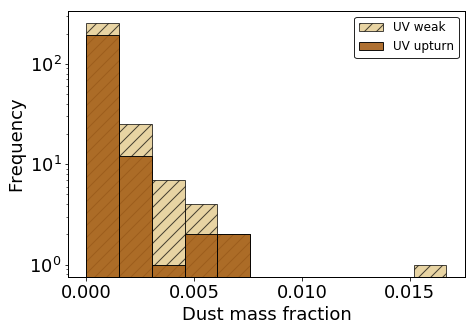

In [27]:
n, bins, patches = plt.hist(uv_weak_objs['mass_fraction'], bins=11, label='UV weak', edgecolor='black', alpha=0.7, 
                            color=uv_pal[0], hatch='//')
plt.hist(uv_uptr_objs['mass_fraction'], bins=bins, label='UV upturn', edgecolor='black', alpha=0.9, color=uv_pal[1])
plt.xlabel('Dust mass fraction')
plt.ylabel('Frequency')
plt.yscale('log')
# plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/matplotlib/pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


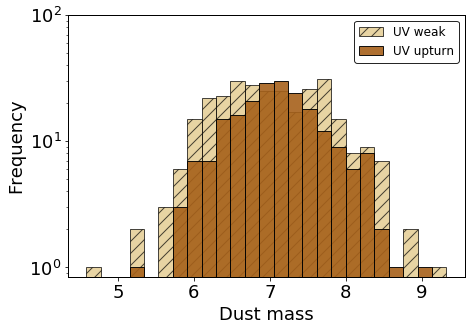

In [28]:
n, bins, patches = plt.hist(np.log10(uv_weak_objs['mass_dust_best_fit'].values), bins=25, label='UV weak', 
                            edgecolor='black', alpha=0.7, color=uv_pal[0], hatch='//')
plt.hist(np.log10(uv_uptr_objs['mass_dust_best_fit'].values), bins=bins, label='UV upturn', edgecolor='black', 
         alpha=0.9, color=uv_pal[1])
plt.xlabel('Dust mass')
plt.ylabel('Frequency')
plt.yscale('log')
plt.ylim(0, 100)
# plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


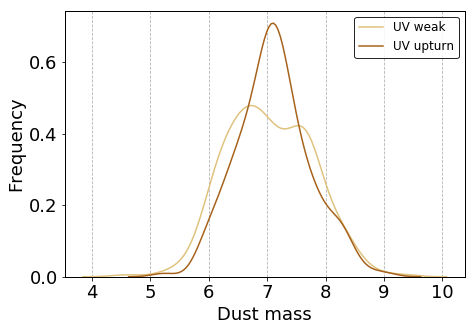

In [29]:
sns.kdeplot(np.log10(uv_weak_objs['mass_dust_best_fit'].values), label='UV weak', color=uv_pal[0])
sns.kdeplot(np.log10(uv_uptr_objs['mass_dust_best_fit'].values), label='UV upturn', color=uv_pal[1])
plt.xlabel('Dust mass')
plt.ylabel('Frequency')
plt.grid(axis='x', which='major', alpha=0.3, linestyle='dashed', color='black')
# plt.yscale('log')
# plt.ylim(0, 100)
# plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.grid

plt.tight_layout()
plt.show()

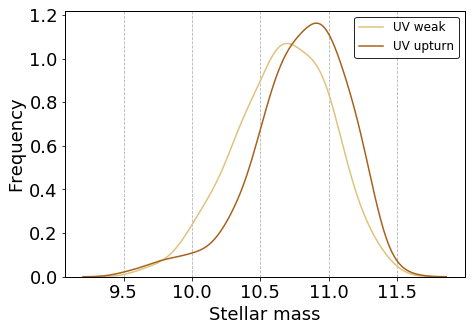

In [30]:
sns.kdeplot(np.log10(uv_weak_objs['mass_stellar_best_fit'].values), label='UV weak', color=uv_pal[0])
sns.kdeplot(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), label='UV upturn', color=uv_pal[1])
plt.xlabel('Stellar mass')
plt.ylabel('Frequency')
plt.grid(axis='x', which='major', alpha=0.3, linestyle='dashed', color='black')
# plt.yscale('log')
# plt.ylim(0, 100)
# plt.ticklabel_format(axis='x', useMathText=True)
plt.legend(loc='best')
plt.grid

plt.tight_layout()
plt.show()

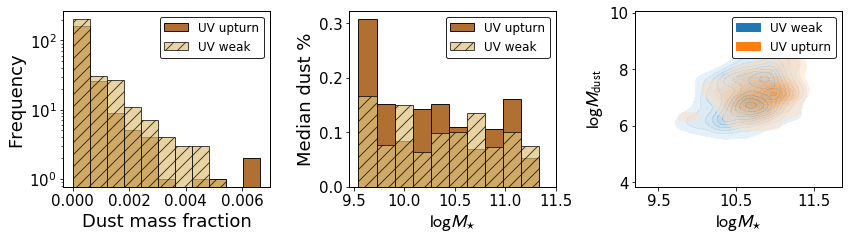

In [31]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
n, bins, patches =  plt.hist(uv_uptr_objs['mass_fraction'], bins=11, label='UV upturn', edgecolor='black', alpha=0.9, 
                             color=uv_pal[1])
plt.hist(uv_weak_objs['mass_fraction'], bins=bins, label='UV weak', edgecolor='black', alpha=0.7, color=uv_pal[0], 
         hatch='//')
plt.xlabel('Dust mass fraction')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend(loc='best')


plt.subplot(1,3,2)
for b in range(barwk_df['smass_bin'].values.size-1):
    plt.bar(x=bar_df['smass_bin'].values[b], height=bar_df['median_massfrac'].values[b]*100, 
            width=(bar_df['smass_bin'].values[b+1]-bar_df['smass_bin'].values[b]), color=uv_pal[1], 
            edgecolor='black', align='edge', alpha=.9, label='UV upturn')
    plt.bar(x=barwk_df['smass_bin'].values[b], height=barwk_df['median_massfrac'].values[b]*100, 
            width=(barwk_df['smass_bin'].values[b+1]-barwk_df['smass_bin'].values[b]), color=uv_pal[0], 
            edgecolor='black', align='edge', alpha=0.7, label='UV weak', hatch='//')
    if b==0:
        plt.legend(loc='best')
    else:
        continue
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel("Median dust %")
plt.xticks([9.5, 10., 10.5, 11., 11.5])

plt.subplot(1,3,3)
sns.kdeplot(data=uvwk_smass, data2=uvwk_dmass, label='UV weak',   shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uvup_smass, data2=uvup_dmass, label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.xticks([9.5, 10.5, 11.5])
plt.legend(loc='best')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log M_{\rm{dust}}$")

plt.tight_layout()
plt.savefig('../../LargeFilesResults/dust.pdf')
plt.show()

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/matplotlib/pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


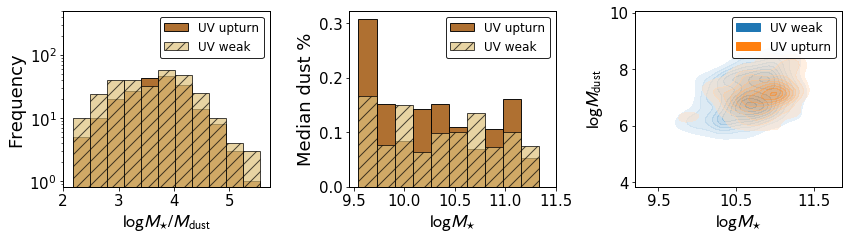

In [32]:
plt.rcParams.update(plotpars_3cols)

plt.subplot(1,3,1)
n, bins, patches =  plt.hist(uv_uptr_objs['log_mdust/mstar'], bins=11, label='UV upturn', edgecolor='black', alpha=0.9, 
                             color=uv_pal[1])
plt.hist(uv_weak_objs['log_mdust/mstar'], bins=bins, label='UV weak', edgecolor='black', alpha=0.7, color=uv_pal[0], 
         hatch='//')
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.ylabel('Frequency')
plt.yscale('log')
plt.ylim([0,500])
plt.legend(loc='best')


plt.subplot(1,3,2)
for b in range(barwk_df['smass_bin'].values.size-1):
    plt.bar(x=bar_df['smass_bin'].values[b], height=bar_df['median_massfrac'].values[b]*100, 
            width=(bar_df['smass_bin'].values[b+1]-bar_df['smass_bin'].values[b]), color=uv_pal[1], 
            edgecolor='black', align='edge', alpha=.9, label='UV upturn')
    plt.bar(x=barwk_df['smass_bin'].values[b], height=barwk_df['median_massfrac'].values[b]*100, 
            width=(barwk_df['smass_bin'].values[b+1]-barwk_df['smass_bin'].values[b]), color=uv_pal[0], 
            edgecolor='black', align='edge', alpha=0.7, label='UV weak', hatch='//')
    if b==0:
        plt.legend(loc='best')
    else:
        continue
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel("Median dust %")
plt.xticks([9.5, 10., 10.5, 11., 11.5])

plt.subplot(1,3,3)
sns.kdeplot(data=uvwk_smass, data2=uvwk_dmass, label='UV weak',   shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uvup_smass, data2=uvup_dmass, label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.xticks([9.5, 10.5, 11.5])
plt.legend(loc='best')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log M_{\rm{dust}}$")

plt.tight_layout()
# plt.savefig('../LargeFilesResults/dust.pdf')
plt.show()

In [33]:
uv_weak_rp['log_mdust/mstar'].describe()

count    118.000000
mean       3.640242
std        0.679514
min        2.324284
25%        3.029203
50%        3.725071
75%        4.194128
max        5.412525
Name: log_mdust/mstar, dtype: float64

In [34]:
uv_uptr_rp['log_mdust/mstar'].describe()

count    87.000000
mean      3.794625
std       0.574018
min       2.206229
25%       3.463133
50%       3.718417
75%       4.184652
max       5.562457
Name: log_mdust/mstar, dtype: float64

In [35]:
uv_uptr_objs['log_mdust/mstar'][uv_uptr_objs['log_mdust/mstar']>2.5].count()

205

In [36]:
uv_uptr_rp['log_mdust/mstar'][uv_uptr_rp['log_mdust/mstar']>2.5].count()

86

In [37]:
uv_weak_objs['log_mdust/mstar'].count()

296

In [38]:
uv_weak_objs['log_mdust/mstar'][uv_weak_objs['log_mdust/mstar']>2.5].count()

282

In [39]:
uv_weak_rp['log_mdust/mstar'][uv_weak_rp['log_mdust/mstar']>2.5].count()

114

In [40]:
uv_uptr_objs['log_mdust/mstar'][uv_uptr_objs['log_mdust/mstar']>2.5].count()

205

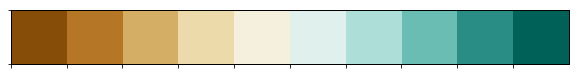

In [41]:
pallette_kde = sns.color_palette("BrBG", 10)
sns.palplot(pallette_kde)

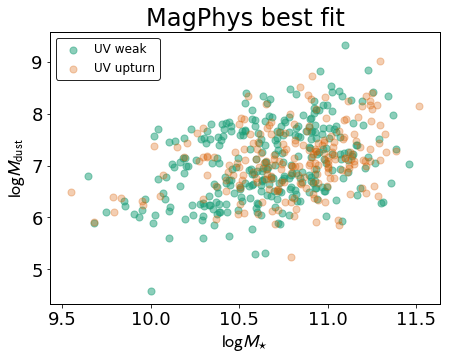

In [42]:
plt.rcParams.update(plotpars)
plt.title('MagPhys best fit')

plt.scatter(x=np.log10(uv_weak_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_weak_objs['mass_dust_best_fit'].values), label='UV weak', alpha=0.5, c=palette[0], s=50)
plt.scatter(x=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), alpha=0.3, c=palette[1], label='UV upturn', s=50)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log M_{\rm{dust}}$")
plt.legend(loc='best')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.pdf')
plt.show()

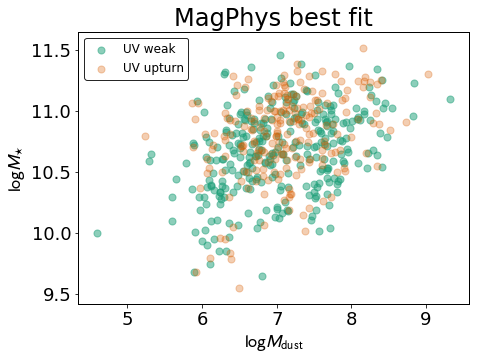

In [43]:
plt.rcParams.update(plotpars)
plt.title('MagPhys best fit')

plt.scatter(y=np.log10(uv_weak_objs['mass_stellar_best_fit'].values), 
            x=np.log10(uv_weak_objs['mass_dust_best_fit'].values), label='UV weak', alpha=0.5, c=palette[0], s=50)
plt.scatter(y=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            x=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), alpha=0.3, c=palette[1], label='UV upturn', s=50)
plt.ylabel(r"$\log M_{\star}$")
plt.xlabel(r"$\log M_{\rm{dust}}$")
plt.legend(loc='best')
# plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.png')
# plt.savefig('../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_scatter.pdf')
plt.show()

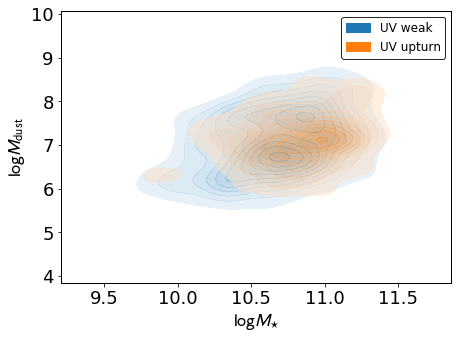

In [44]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=np.log10(uv_weak_objs['mass_stellar_best_fit'].values),
            data2=np.log10(uv_weak_objs['mass_dust_best_fit'].values), 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            data2=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log M_{\rm{dust}}$")
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass.pdf')
plt.show()

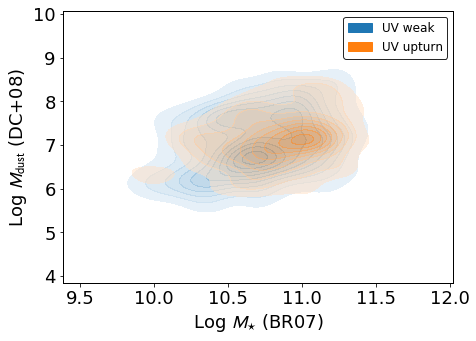

In [45]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=uv_weak_objs['logmstar'].values, data2=np.log10(uv_weak_objs['mass_dust_best_fit'].values), 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=uv_uptr_objs['logmstar'].values, data2=np.log10(uv_uptr_objs['mass_dust_best_fit'].values), 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel(r"Log $M_{\star}$ (BR07)")
plt.ylabel(r"Log $M_{\rm{dust}}$ (DC+08)")
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_mass_II.pdf')
plt.show()

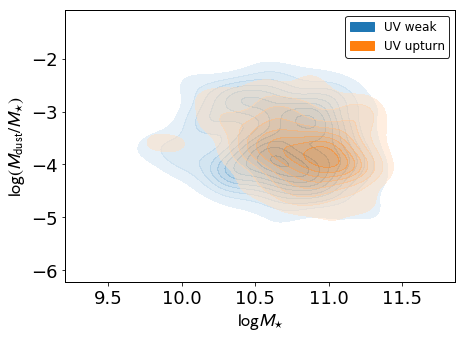

In [46]:
plt.rcParams.update(plotpars)
sns.kdeplot(data=np.log10(uv_weak_objs['mass_stellar_best_fit'].values),
            data2=np.log10(uv_weak_objs['mass_dust_best_fit'].values/uv_weak_objs['mass_stellar_best_fit'].values), 
            label='UV weak', shade=True, shade_lowest=False, alpha=0.5)
sns.kdeplot(data=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            data2=np.log10(uv_uptr_objs['mass_dust_best_fit'].values/uv_uptr_objs['mass_stellar_best_fit'].values), 
            label='UV upturn', shade=True, shade_lowest=False, alpha=0.5)
plt.legend(loc='best')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log (M_{\rm{dust}}/M_{\star})$")
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_massIII.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_massIII.pdf')
plt.show()

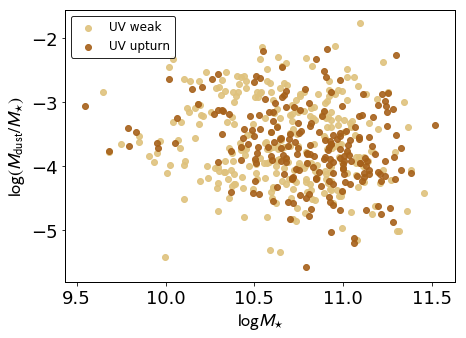

In [47]:
plt.rcParams.update(plotpars)
plt.scatter(x=np.log10(uv_weak_objs['mass_stellar_best_fit'].values),
            y=np.log10(uv_weak_objs['mass_dust_best_fit'].values/uv_weak_objs['mass_stellar_best_fit'].values), 
            label='UV weak', alpha=0.9, c=uv_pal[0])
plt.scatter(x=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values/uv_uptr_objs['mass_stellar_best_fit'].values), 
            label='UV upturn', alpha=0.9, c=uv_pal[1])
plt.legend(loc='best')
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel(r"$\log (M_{\rm{dust}}/M_{\star})$")
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_massIV.png')
plt.savefig('../../LargeFilesResults/PaperFigs/stellar_vs_dust_massIV.pdf')
plt.show()

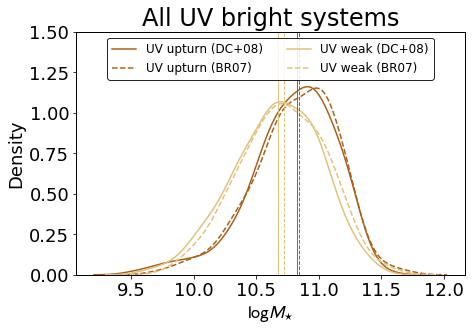

In [48]:
plt.title("All UV bright systems")

sns.kdeplot(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), label='UV upturn (DC+08)', 
            color=uv_pal[1])
sns.kdeplot(uv_uptr_objs['logmstar'].values, label='UV upturn (BR07)', color=uv_pal[1], linestyle='--')
sns.kdeplot(np.log10(uv_weak_objs['mass_stellar_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0])
sns.kdeplot(uv_weak_objs['logmstar'].values, label='UV weak (BR07)', color=uv_pal[0], linestyle='--')
plt.axvline(x=np.median(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values)), color=uv_pal[1], lw=1.)
plt.axvline(x=np.median(uv_uptr_objs['logmstar']), color=uv_pal[1], linestyle='--', lw=1.)
plt.axvline(x=np.median(np.log10(uv_weak_objs['mass_stellar_best_fit'].values)), color=uv_pal[0], lw=1.)
plt.axvline(x=np.median(uv_weak_objs['logmstar']), color=uv_pal[0], linestyle='--', lw=1.)

plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 
# plt.grid(axis='x', which='major', alpha=0.3, linestyle='dashed', color='black')
plt.ylim(0, 1.5)
plt.legend(loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

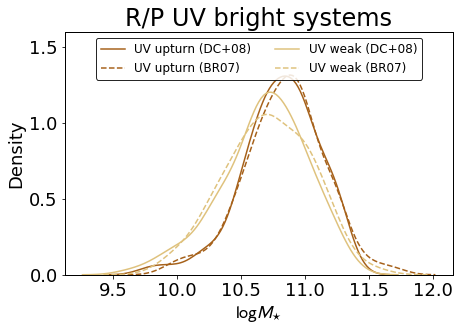

In [49]:
plt.title("R/P UV bright systems")
sns.kdeplot(np.log10(uv_uptr_rp['mass_stellar_best_fit'].values), label='UV upturn (DC+08)', 
            color=uv_pal[1])
sns.kdeplot(uv_uptr_rp['logmstar'].values, label='UV upturn (BR07)', color=uv_pal[1], linestyle='--')
sns.kdeplot(np.log10(uv_weak_rp['mass_stellar_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0])
sns.kdeplot(uv_weak_objs['logmstar'].values, label='UV weak (BR07)', color=uv_pal[0], linestyle='--')
# plt.axvline(x=np.median(np.log10(uv_uptr_rp['mass_stellar_best_fit'].values)), color=uv_pal[1], lw=1.)
# plt.axvline(x=np.median(uv_uptr_rp['logmstar']), color=uv_pal[1], linestyle='--', lw=1.)
# plt.axvline(x=np.median(np.log10(uv_weak_rp['mass_stellar_best_fit'].values)), color=uv_pal[0], lw=1.)
# plt.axvline(x=np.median(uv_weak_rp['logmstar']), color=uv_pal[0], linestyle='--', lw=1.)

plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 
# plt.grid(axis='x', which='major', alpha=0.3, linestyle='dashed', color='black')
plt.ylim(0, 1.6)
plt.legend(loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

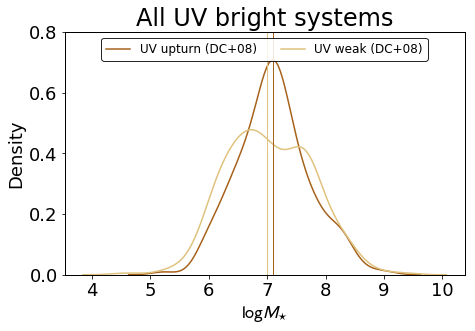

In [50]:
plt.title("All UV bright systems")

sns.kdeplot(np.log10(uv_uptr_objs['mass_dust_best_fit'].values), label='UV upturn (DC+08)', color=uv_pal[1])
sns.kdeplot(np.log10(uv_weak_objs['mass_dust_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0])
plt.axvline(x=np.median(np.log10(uv_uptr_objs['mass_dust_best_fit'].values)), color=uv_pal[1], lw=1.)
plt.axvline(x=np.median(np.log10(uv_weak_objs['mass_dust_best_fit'].values)), color=uv_pal[0], lw=1.)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 
plt.ylim(0, 0.8)
plt.legend(loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

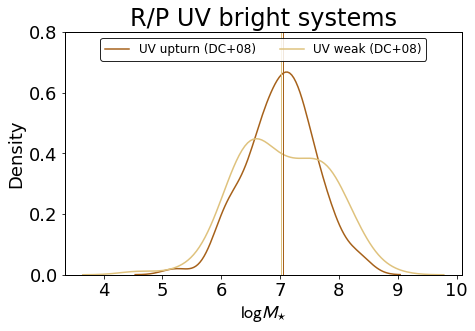

In [51]:
plt.title("R/P UV bright systems")

sns.kdeplot(np.log10(uv_uptr_rp['mass_dust_best_fit'].values), label='UV upturn (DC+08)', color=uv_pal[1])
sns.kdeplot(np.log10(uv_weak_rp['mass_dust_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0])
plt.axvline(x=np.median(np.log10(uv_uptr_rp['mass_dust_best_fit'].values)), color=uv_pal[1], lw=1.)
plt.axvline(x=np.median(np.log10(uv_weak_rp['mass_dust_best_fit'].values)), color=uv_pal[0], lw=1.)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 
plt.ylim(0, 0.8)
plt.legend(loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

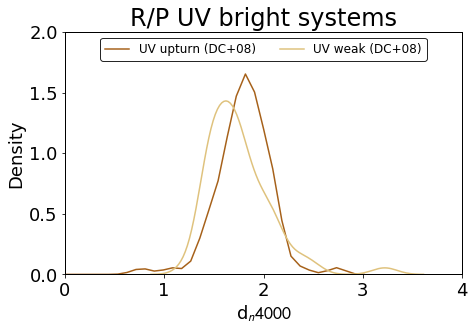

In [52]:
plt.title("R/P UV bright systems")

sns.kdeplot(uv_uptr_rp['D4000N'].values, label='UV upturn (DC+08)', color=uv_pal[1])
sns.kdeplot(uv_weak_rp['D4000N'].values, label='UV weak (DC+08)', color=uv_pal[0])
# plt.axvline(x=np.median(np.log10(uv_uptr_rp['mass_dust_best_fit'].values)), color=uv_pal[1], lw=1.)
# plt.axvline(x=np.median(np.log10(uv_weak_rp['mass_dust_best_fit'].values)), color=uv_pal[0], lw=1.)
plt.xlabel(r"d$_{n}4000$")
plt.ylabel('Density') 
plt.ylim(0, 2.)
plt.xlim(0,4)
plt.legend(loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

In [53]:
print(np.median(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values)))
print(np.median(uv_uptr_objs['logmstar'].values))

10.8258356801574
10.8463


In [54]:
print(np.median(np.log10(uv_weak_objs['mass_stellar_best_fit'].values)))
print(np.median(uv_weak_objs['logmstar'].values))

10.678787617112764
10.720115


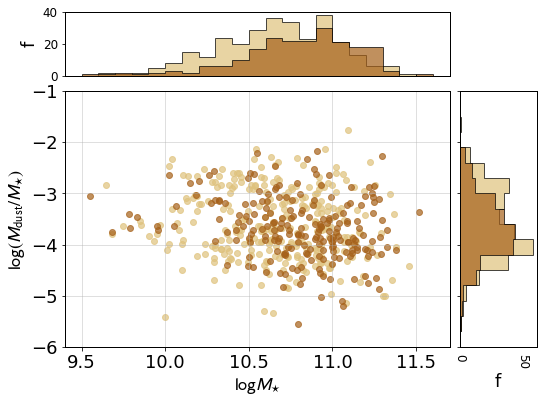

In [55]:
alpha=0.7

grid = GridSpec(nrows=2, ncols=2, height_ratios=[0.5, 2], width_ratios=[2, 0.4])

fig = plt.figure(figsize=(8,6))
plt.rcParams.update(plotpars)

# Creating the joined figures layout ---------------------------------------------------------------------------------
main_joint = fig.add_subplot(grid[1,0])
ax_marg_x  = fig.add_subplot(grid[0,0])
ax_marg_y  = fig.add_subplot(grid[1,1])

    
# Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------------
main_joint.scatter(x=np.log10(uv_weak_objs['mass_stellar_best_fit'].values),
            y=np.log10(uv_weak_objs['mass_dust_best_fit'].values/uv_weak_objs['mass_stellar_best_fit'].values), 
            label='UV weak', alpha=alpha, c=uv_pal[0])
main_joint.scatter(x=np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), 
            y=np.log10(uv_uptr_objs['mass_dust_best_fit'].values/uv_uptr_objs['mass_stellar_best_fit'].values), 
            label='UV upturn', alpha=alpha, c=uv_pal[1])

main_joint.set_xlim([9.4, 11.7])
main_joint.set_ylim([-6,-1])
main_joint.grid('--', alpha=0.5)

# Stellar mass distribution -- on the top -----------------------------------------------------------------------------

bins = np.arange(start=9.4, stop=11.7, step=0.1)

n, bins, patches = ax_marg_x.hist(np.log10(uv_weak_objs['mass_stellar_best_fit'].values), color=uv_pal[0], 
                                                alpha=alpha, bins=bins, edgecolor='black', density=False, 
                                                histtype='stepfilled')
n, bins, patches = ax_marg_x.hist(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), color=uv_pal[1], 
                                                alpha=alpha, bins=bins, edgecolor='black', density=False, 
                                                histtype='stepfilled')

# colors distribution --on the right ---------------------------------------------------------------------------------
bins = np.arange(start=-6, stop=-1, step=0.3)
n, bins, patches = ax_marg_y.hist((np.log10(uv_weak_objs['mass_dust_best_fit'].values/
                                                  uv_weak_objs['mass_stellar_best_fit'].values)), 
                                        orientation='horizontal', color=uv_pal[0], alpha=alpha, bins=bins, 
                                        edgecolor='black', density=False, histtype='stepfilled')
                                        
n, bins, patches = ax_marg_y.hist(np.log10(uv_uptr_objs['mass_dust_best_fit'].values/
                                                 uv_uptr_objs['mass_stellar_best_fit'].values), orientation="horizontal", 
                                        color=uv_pal[1], alpha=alpha, bins=bins, edgecolor='black', density=False, 
                                        histtype='stepfilled')

# Turn off tick labels on margins
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_marg_x.minorticks_off()
ax_marg_y.minorticks_off()

ax_marg_x.tick_params(axis='x', bottom=False)
ax_marg_y.tick_params(axis='x', which='both', bottom=False)

ax_marg_x.set_ylabel("f")
ax_marg_y.set_xlabel("f")

# # Ticks rotation
ax_marg_x.yaxis.set_tick_params(labelsize=12)
ax_marg_y.xaxis.set_tick_params(labelsize=12, rotation=-90)

ax_marg_x.set_xlim([9.4, 11.7])
ax_marg_y.set_ylim([-6,-1])

# Set labels on joint
main_joint.set_xlabel(r"$\log M_{\star}$")
main_joint.set_ylabel(r"$\log (M_{\rm{dust}}/M_{\star})$")

plt.tight_layout(h_pad=0., w_pad=0.)
plt.savefig('../../LargeFilesResults/PaperFigs/dust_mass_relation.pdf')
plt.savefig('../../LargeFilesResults/PaperFigs/dust_mass_relation.png')
plt.show()

In [56]:
plt.ticklabel_format?

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/matplotlib/pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


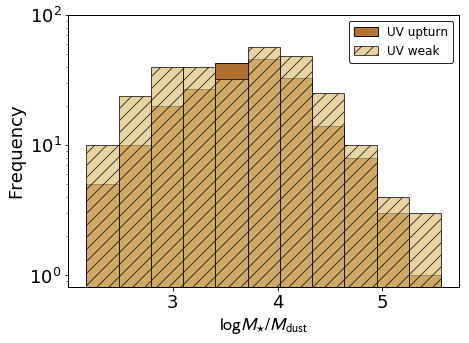

In [57]:
plt.rcParams.update(plotpars)
n, bins, patches =  plt.hist(uv_uptr_objs['log_mdust/mstar'], bins=11, label='UV upturn', edgecolor='black', alpha=0.9, 
                             color=uv_pal[1])
plt.hist(uv_weak_objs['log_mdust/mstar'], bins=bins, label='UV weak', edgecolor='black', alpha=0.7, color=uv_pal[0], 
         hatch='//')
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.ylabel('Frequency')
plt.yscale('log')
plt.ylim([0,100])
plt.legend(loc='best')
plt.show()

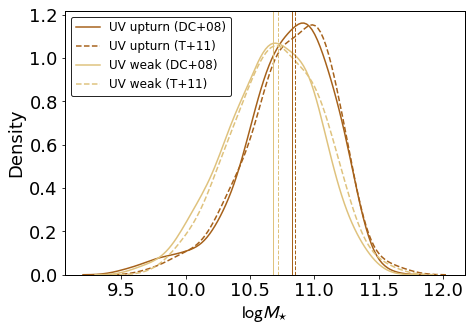

In [58]:
plt.rcParams.update(plotpars)
sns.kdeplot(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), label='UV upturn (DC+08)', color=uv_pal[1])
sns.kdeplot(uv_uptr_objs['logmstar'].values, label='UV upturn (T+11)', color=uv_pal[1], linestyle='--')
sns.kdeplot(np.log10(uv_weak_objs['mass_stellar_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0])
sns.kdeplot(uv_weak_objs['logmstar'].values, label='UV weak (T+11)', color=uv_pal[0], linestyle='--')

plt.axvline(x=np.median(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values)), color=uv_pal[1], lw=1.)
plt.axvline(x=np.median(uv_uptr_objs['logmstar']), color=uv_pal[1], linestyle='--', lw=1.)
plt.axvline(x=np.median(np.log10(uv_weak_objs['mass_stellar_best_fit'].values)), color=uv_pal[0], lw=1.)
plt.axvline(x=np.median(uv_weak_objs['logmstar']), color=uv_pal[0], linestyle='--', lw=1.)

plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 
# plt.ylim(0, 3.)

plt.tight_layout()
plt.savefig('../../LargeFilesResults/PaperFigs/masses_agreement.pdf')
plt.savefig('../../LargeFilesResults/PaperFigs/masses_agreement.png')
plt.show()

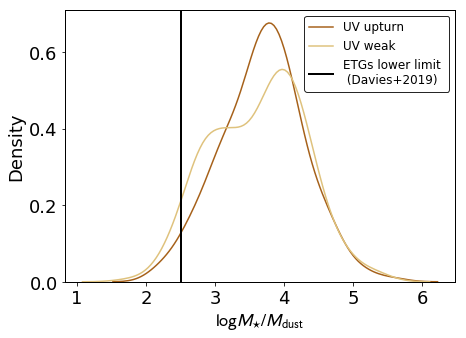

In [59]:
plt.rcParams.update(plotpars)
sns.kdeplot(uv_uptr_objs['log_mdust/mstar'], label='UV upturn', color=uv_pal[1])
sns.kdeplot(uv_weak_objs['log_mdust/mstar'], label='UV weak', color=uv_pal[0])
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)')
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.ylabel('Density')
# plt.xlim([0.7, 7.1])
plt.legend(loc='upper right')
plt.savefig('../../LargeFilesResults/dust_frac.pdf')
plt.savefig('../../LargeFilesResults/dust_frac.png')
plt.show()

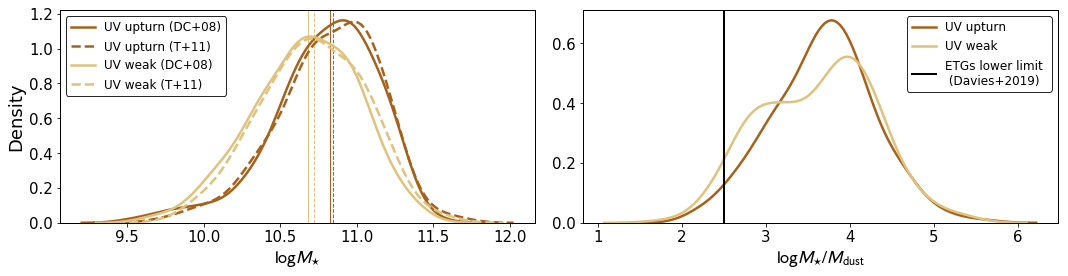

In [60]:
plt.rcParams.update(plotpars_2cols)

plt.subplot(1,2,1)
plt.axvline(x=np.median(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values)), color=uv_pal[1], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_uptr_objs['logmstar']), color=uv_pal[1], linestyle='--', lw=1, alpha=1.)
plt.axvline(x=np.median(np.log10(uv_weak_objs['mass_stellar_best_fit'].values)), color=uv_pal[0], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_weak_objs['logmstar']), color=uv_pal[0], linestyle='--', lw=1., alpha=1.)

sns.kdeplot(np.log10(uv_uptr_objs['mass_stellar_best_fit'].values), label='UV upturn (DC+08)', color=uv_pal[1], lw=2.5, 
            alpha=1.)
sns.kdeplot(uv_uptr_objs['logmstar'].values, label='UV upturn (T+11)', color=uv_pal[1], linestyle='--', lw=2.5, 
            alpha=1.)
sns.kdeplot(np.log10(uv_weak_objs['mass_stellar_best_fit'].values), label='UV weak (DC+08)', color=uv_pal[0], lw=2.5, 
            alpha=1.)
sns.kdeplot(uv_weak_objs['logmstar'].values, label='UV weak (T+11)', color=uv_pal[0], linestyle='--', lw=2.5, alpha=1.)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 

plt.subplot(1,2,2)
sns.kdeplot(uv_uptr_objs['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], lw=2.5, alpha=1.)
sns.kdeplot(uv_weak_objs['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=1.)
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)', alpha=1.)
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
# plt.ylabel('Density')
# plt.xlim([0.7, 7.1])
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../../LargeFilesResults/PaperFigs/dust_masses.png')
plt.savefig('../../LargeFilesResults/PaperFigs/dust_masses.pdf')
plt.show()

In [61]:
limit1 = 5.4+0.235   # nuv-r
limit2 = 0.9+0.0982  # fuv-nuv
limit3 = 6.6+0.333   # fuv-r

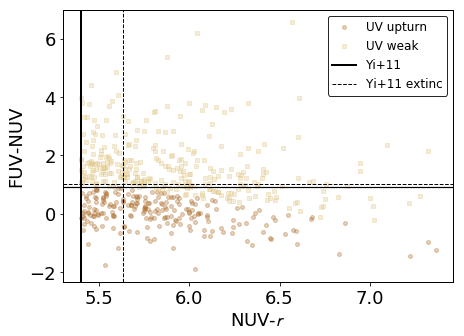

In [62]:
plt.rcParams.update(plotpars)
plot01, = plt.plot(uv_uptr_objs['MAG_ABSOLUTE_NUV']-uv_uptr_objs['MAG_ABSOLUTE_R'], 
                   uv_uptr_objs['MAG_ABSOLUTE_FUV']-uv_uptr_objs['MAG_ABSOLUTE_NUV'], 'o', markersize=4, 
                   color = '#a6611a', alpha=0.3, label="UV upturn")
plot02, = plt.plot(uv_weak_objs['MAG_ABSOLUTE_NUV']-uv_weak_objs['MAG_ABSOLUTE_R'], 
                   uv_weak_objs['MAG_ABSOLUTE_FUV']-uv_weak_objs['MAG_ABSOLUTE_NUV'], 's', 
                   markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")

plt.axvline(x=(5.4), color='black', linewidth=2., label='Yi+11')
plt.axvline(x=(5.4+0.235), color='black', linewidth=1., linestyle='--', label='Yi+11 extinc')
plt.axhline(y=0.9, xmin=0, xmax=2, color='black', linewidth=1.2)
plt.axhline(y=(0.9+0.0982), xmin=0, xmax=2, color='black', linewidth=1., linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"NUV-$r$")
plt.ylabel("FUV-NUV")
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.pdf')
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.png')
plt.show()

In [63]:
%matplotlib notebook

In [64]:
uvweak_miss= uv_weak_objs.loc[(uv_weak_objs['MAG_ABSOLUTE_NUV']-uv_weak_objs['MAG_ABSOLUTE_R']<=limit1) | 
                              (uv_weak_objs['MAG_ABSOLUTE_FUV']-uv_weak_objs['MAG_ABSOLUTE_R']<=limit3)]

In [65]:
uvup_miss = uv_uptr_objs.loc[(uv_uptr_objs['MAG_ABSOLUTE_NUV']-uv_uptr_objs['MAG_ABSOLUTE_R']>=limit1)]

In [66]:
uvweak_miss.describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile84,L_dust_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,mass_fraction,log_mdust/mstar
count,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.733695e+05,5.879654e+17,182.215441,0.160952,3.570559,4.943077,25.111564,5.001143,1.636364,19.467732,...,10.159196,10.330503,6.221041e+07,6.387909,6.780217,7.163399,7.534378,7.842769,0.000987,3.431301
std,9.828211e+05,4.508157e+14,31.489822,1.368716,0.344485,0.682247,16.848957,21.401604,0.989704,0.602639,...,0.474827,0.452004,1.919623e+08,0.727062,0.598720,0.515450,0.483401,0.475692,0.001797,0.628083
min,1.504000e+04,5.877230e+17,129.860900,-2.967442,3.500000,3.960000,18.527800,0.015800,0.000000,16.776700,...,9.187000,9.417000,7.788000e+05,4.877000,5.502000,6.132000,6.582000,6.907000,0.000015,1.769797
25%,1.255430e+05,5.877247e+17,174.619700,-1.052823,3.500000,4.620000,20.740600,0.056650,2.000000,19.169050,...,9.859500,10.050000,5.668000e+06,5.824500,6.337000,6.814500,7.224500,7.509500,0.000118,2.877008
50%,2.672340e+05,5.877260e+17,181.914900,-0.031320,3.500000,4.620000,21.157800,0.096600,2.000000,19.482300,...,10.110000,10.270000,1.683000e+07,6.332000,6.752000,7.147000,7.512000,7.792000,0.000340,3.468703
75%,5.368415e+05,5.877300e+17,214.756950,1.381154,3.500000,5.280000,21.857900,0.189200,2.000000,19.842700,...,10.460000,10.605000,5.094500e+07,6.924500,7.184500,7.499500,7.817000,8.084500,0.001326,3.929862
max,3.900210e+06,5.888489e+17,222.979100,2.943146,7.470000,10.560000,99.000000,99.000000,3.000000,22.384800,...,11.490000,11.530000,2.117000e+09,8.307000,8.357000,8.407000,8.832000,9.252000,0.016707,4.828237


In [67]:
uvup_miss.describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile84,L_dust_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,mass_fraction,log_mdust/mstar
count,1.410000e+02,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.964057e+05,5.879868e+17,177.577419,0.393908,3.574681,4.963121,30.666521,12.137316,1.858156,19.436577,...,10.089816,10.273298,4.240004e+07,6.208667,6.661610,7.074801,7.462993,7.788489,0.000523,3.720601
std,9.825557e+05,4.634141e+14,33.278253,1.387734,0.205112,0.540150,25.406359,32.281917,0.883027,0.495258,...,0.322004,0.308392,1.111479e+08,0.594288,0.476534,0.400892,0.370798,0.368148,0.001043,0.600854
min,1.492200e+04,5.877230e+17,129.443700,-2.183579,3.500000,3.500000,19.447200,0.026300,0.000000,18.106600,...,9.212000,9.482000,7.500000e+05,4.952000,5.517000,6.077000,6.522000,6.892000,0.000008,2.174809
25%,1.438450e+05,5.877251e+17,137.638500,-0.753219,3.500000,4.620000,20.792800,0.063500,2.000000,19.144600,...,9.882000,10.040000,5.203000e+06,5.757000,6.337000,6.827000,7.217000,7.532000,0.000076,3.356740
50%,3.243020e+05,5.877260e+17,180.638100,0.240714,3.500000,5.280000,21.153300,0.105900,2.000000,19.401000,...,10.110000,10.280000,1.215000e+07,6.117000,6.597000,7.067000,7.432000,7.767000,0.000174,3.758298
75%,5.369030e+05,5.880109e+17,213.626800,1.682114,3.500000,5.280000,22.253200,0.295700,2.000000,19.734600,...,10.300000,10.480000,2.682000e+07,6.547000,6.937000,7.287000,7.717000,8.017000,0.000440,4.116485
max,3.910157e+06,5.888489e+17,223.497600,2.930064,4.800000,6.600000,99.000000,99.000000,3.000000,20.879300,...,11.140000,11.200000,1.054000e+09,7.992000,8.107000,8.237000,8.522000,8.967000,0.006642,5.111738


<IPython.core.display.Javascript object>


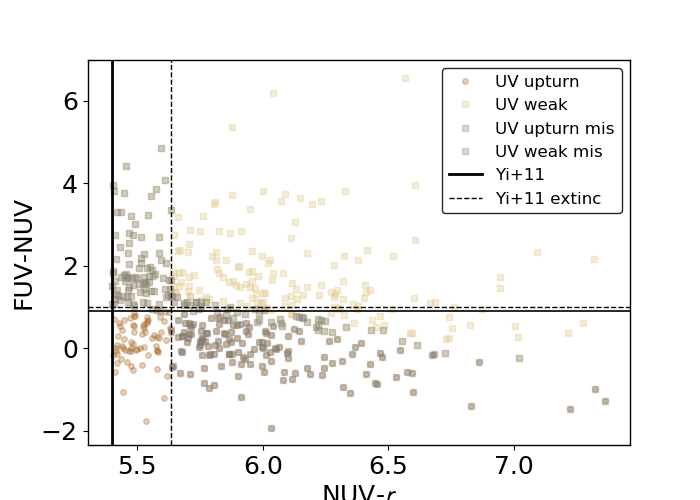

In [68]:
plt.rcParams.update(plotpars)
plot01, = plt.plot(uv_uptr_objs['MAG_ABSOLUTE_NUV']-uv_uptr_objs['MAG_ABSOLUTE_R'], 
                   uv_uptr_objs['MAG_ABSOLUTE_FUV']-uv_uptr_objs['MAG_ABSOLUTE_NUV'], 'o', markersize=4, 
                   color = '#a6611a', alpha=0.3, label="UV upturn")
plot02, = plt.plot(uv_weak_objs['MAG_ABSOLUTE_NUV']-uv_weak_objs['MAG_ABSOLUTE_R'], 
                   uv_weak_objs['MAG_ABSOLUTE_FUV']-uv_weak_objs['MAG_ABSOLUTE_NUV'], 's', 
                   markersize=4, color = '#dfc27d', alpha=0.3, label="UV weak")

plot03, = plt.plot(uvup_miss['MAG_ABSOLUTE_NUV']-uvup_miss['MAG_ABSOLUTE_R'], 
                   uvup_miss['MAG_ABSOLUTE_FUV']-uvup_miss['MAG_ABSOLUTE_NUV'], 's', 
                   markersize=4, color = 'gray', alpha=0.3, label="UV upturn mis")

plot04, = plt.plot(uvweak_miss['MAG_ABSOLUTE_NUV']-uvweak_miss['MAG_ABSOLUTE_R'], 
                   uvweak_miss['MAG_ABSOLUTE_FUV']-uvweak_miss['MAG_ABSOLUTE_NUV'], 's', 
                   markersize=4, color = 'gray', alpha=0.3, label="UV weak mis")

plt.axvline(x=(5.4), color='black', linewidth=2., label='Yi+11')
plt.axvline(x=(5.4+0.235), color='black', linewidth=1., linestyle='--', label='Yi+11 extinc')
plt.axhline(y=0.9, xmin=0, xmax=2, color='black', linewidth=1.2)
plt.axhline(y=(0.9+0.0982), xmin=0, xmax=2, color='black', linewidth=1., linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"NUV-$r$")
plt.ylabel("FUV-NUV")
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.pdf')
# plt.savefig('../../Figs/g2_maglim_yi_diagram_e.png')
plt.show()

In [69]:
uv_uptr_objs.describe()

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile84,L_dust_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,mass_fraction,log_mdust/mstar
count,2.100000e+02,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,2.100000e+02,210.00000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.224266e+05,5.879827e+17,176.388658,0.335334,3.585476,4.930857,28.299444,9.143645,1.833333,19.457503,...,10.089629,10.271162,3.811083e+07,6.23031,6.672714,7.079810,7.464833,7.787048,0.000525,3.686322
std,1.034538e+06,4.581978e+14,33.451299,1.342132,0.245035,0.516614,22.368468,28.412740,0.883573,0.491964,...,0.354616,0.338166,9.404782e+07,0.63067,0.512824,0.433158,0.396131,0.386130,0.000943,0.601695
min,6.840000e+03,5.877230e+17,129.347500,-2.227744,3.500000,3.500000,19.447200,0.026300,0.000000,17.712000,...,9.037000,9.292000,1.701000e+05,4.75700,5.322000,5.887000,6.407000,6.807000,0.000003,2.174809
25%,1.440398e+05,5.877251e+17,136.811975,-0.754621,3.500000,4.620000,20.754450,0.060075,2.000000,19.155875,...,9.862000,10.032500,4.993750e+06,5.80575,6.333250,6.813250,7.208250,7.523250,0.000083,3.255059
50%,3.018780e+05,5.877260e+17,180.166400,0.251174,3.500000,4.620000,21.149750,0.096100,2.000000,19.448000,...,10.105000,10.280000,1.243500e+07,6.10950,6.609500,7.062000,7.434500,7.769500,0.000194,3.711222
75%,5.460868e+05,5.880109e+17,213.664600,1.420382,3.537500,5.280000,22.036275,0.196250,2.000000,19.742150,...,10.317500,10.490000,2.789250e+07,6.57075,6.965750,7.300750,7.720750,8.025750,0.000556,4.081280
max,3.910157e+06,5.888489e+17,223.497600,2.959534,5.830000,6.600000,99.000000,99.000000,3.000000,20.879300,...,11.140000,11.320000,1.054000e+09,7.99200,8.107000,8.237000,8.602000,8.967000,0.006642,5.562457
